# Project: healthcare dataset

# Introduction
This healthcare dataset provides comprehensive information about patients, including details related to age, gender, blood type, medical conditions, admission dates, doctors, hospitals, insurance providers, billing amounts, and other important factors.

The dataset is used to analyze healthcare patterns, identify health risks, and develop strategies for improving care. It can also help understand the impact of various factors on patient health, contributing to the enhancement of healthcare services provide.

The dataset includes information about a number of patients, with details about their health conditions, prescribed medications, and test results. By analyzing this information, valuable insights can be provided to support data-driven decision-making and improve the quality of healthcare.

### Import necessary libraries

In [4460]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Merge
Read the two files to be merged and display some information about them

In [4462]:
# Load data from Excel files
data1 = pd.read_excel(r"C:\Users\Future\OneDrive\Desktop\PROJECTS\file1.xlsx")
data2 = pd.read_excel(r"C:\Users\Future\OneDrive\Desktop\PROJECTS\file2.xlsx")
print(f" First fifth rows of data1set1 is \n",data1.head())
print(f" First fifth rows of data1set2 is \n",data2.head)

 First fifth rows of data1set1 is 
    id           Name   Age  Gender Blood Type Medical Condition  \
0   1  Bobby JacksOn  30.0    Male         B-            Cancer   
1   2   LesLie TErRy  62.0    Male         A+           Obesity   
2   3    DaNnY sMitH  76.0  Female         A-           Obesity   
3   4   andrEw waTtS  28.0  Female         O+          Diabetes   
4   5  adrIENNE bEll  43.0  Female        AB+            Cancer   

  Date of Admission            Doctor                    Hospital  
0        2024-01-31     Matthew Smith             Sons and Miller  
1        2019-08-20   Samantha Davies                     Kim Inc  
2        2022-09-22  Tiffany Mitchell                    Cook PLC  
3        2020-11-18       Kevin Wells  Hernandez Rogers and Vang,  
4        2022-09-19    Kathleen Hanna                 White-White  
 First fifth rows of data1set2 is 
 <bound method NDFrame.head of         id Insurance Provider  Billing Amount Room Number Admission Type  \
0        1 

Merge the two files using the 'id' column

In [4464]:
# Merge the two datasets
df = pd.merge(data1, data2, on='id', how='outer')  # Use 'outer' merge for a comprehensive dataset

# Save merged data to a new Excel file
output_path = r"C:\Users\Future\OneDrive\Desktop\PROJECTS\output.xlsx"
df.to_excel(output_path, index=False)

# Information of DataFrame
print("Dimensions of DF: ", df.shape)
print(df.info())

Dimensions of DF:  (5020, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  5020 non-null   int64         
 1   Name                5019 non-null   object        
 2   Age                 5019 non-null   float64       
 3   Gender              5019 non-null   object        
 4   Blood Type          5019 non-null   object        
 5   Medical Condition   5019 non-null   object        
 6   Date of Admission   5019 non-null   datetime64[ns]
 7   Doctor              5019 non-null   object        
 8   Hospital            5019 non-null   object        
 9   Insurance Provider  5019 non-null   object        
 10  Billing Amount      5019 non-null   float64       
 11  Room Number         5019 non-null   object        
 12  Admission Type      5019 non-null   object        
 13  Discharge Date    

# Data cleaning
Data cleaning is the process of correcting or removing incorrect, duplicate, noisy, or incomplete data within a dataset. During the data cleaning phase, data wrangling is performed to transform the data into a more usable form.

## Problems With the Dataset

1. **Remove duplication in the rows**: 
   - Check and process if duplicates exist.

2. **Remove rows containing noisy data**: 
   - Some patients have a negative bill amount, and there are patients whose ages exceed 100 years.
     
3. **Correcting some columns('Name','Gender')**: 
   - The Name column contains random uppercase letters.
   - the Gender column contains values other than 'Male' and 'Female'.
     
4. **Check for NaN values**: 
   - Modify NaN values with a suitable value (zero, mean, median, or leave as is depending on the data).

5. **Modify the datatype of `Date of Admission` and `Discharge Date` columns**: 
   - Change the datatype from string to date.


## 1- Remove duplication in the rows 
### Check and process if duplicates exist.

In [4468]:
duplicates_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")
# Remove duplicates if any exist
if duplicates_count > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicate rows have been removed.")
else:
    print("No duplicate rows found.")

Number of duplicate rows: 0
No duplicate rows found.


## 2- Remove rows that contain noisy data 
### Some patients have a negative bill amount, and there are patients whose ages exceed 100 years

In [4470]:
print(f"Billing Amount Range before: {df['Billing Amount'].min()} to {df['Billing Amount'].max()}")
if (df['Billing Amount'] <= 0).any():
    df = df[df['Billing Amount'] >= 0]
print(f"Billing Amount Range after: {df['Billing Amount'].min()} to {df['Billing Amount'].max()}")

print(f"Age Range before: {df['Age'].min()} to {df['Age'].max()}")
df = df[df['Age'] < 100]
print(f"Age Range after: {df['Age'].min()} to {df['Age'].max()}")

Billing Amount Range before: -1310.272895 to 52181.837792399056
Billing Amount Range after: 42.5145885533243 to 52181.837792399056
Age Range before: 18.0 to 1000.0
Age Range after: 18.0 to 90.0


## 3- Correcting some columns
### Standardizing Name Format and Validating Gender Values

In [4472]:
df['Name'] = df['Name'].str.lower()
df['Name'] = df['Name'].str.title()

valid_genders = ['Male', 'Female']
df = df[df['Gender'].isin(valid_genders)]
df

,id,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,1,Bobby Jackson,30.0,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,2,Leslie Terry,62.0,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,3,Danny Smith,76.0,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,4,Andrew Watts,28.0,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,5,Adrienne Bell,43.0,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5011,5012,Bonnie Smith,58.0,Male,A+,Obesity,2022-05-13,Pam Malone,Walsh-Williams,UnitedHealthcare,29907.377558,382,Elective,2022-06-07,Penicillin,Inconclusive
5012,5013,Laura Jones,79.0,Male,O+,Asthma,2023-12-30,Sharon Stanley,"and Perkins Johnson, Bryant",Aetna,48418.747045,188,Emergency,2024-01-16,Penicillin,Abnormal
5015,5016,Douglas Padilla,38.0,Male,B-,Cancer,2021-12-09,Robin Cochran,Sweeney-Robertson,Cigna,3254.394435,442,Elective,2021-12-30,Paracetamol,Abnormal
5017,5018,Jacob Roach,20.0,Female,A+,Asthma,2023-02-19,Howard Sutton,"Murphy and Rodriguez, Brown",Blue Cross,6374.484081,129,Urgent,2023-03-07,Aspirin,Abnormal


## 4- Check for NaN values

In [4474]:
# Check for missing values in each column
print(df.isnull().sum())

id                    0
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


Using info function on DF , There is no column containing any NaN values.


## 5- Modify the datatype
### Modify the datatype of 'Date of Admission'and 'Discharge Date' columns to the correct datatype (from string into date)

In [4477]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

# Exploratory Data Analysis (EDA)
There is a need for a Treatment period coulumn to be used in EDA phase. (Treatment period = Discharge Date - Date of Admissiont)

In [4479]:
df['Treatment period'] = (df['Discharge Date'] - df['Date of Admission']).dt.days
df.head(5)

,id,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Treatment period
0,1,Bobby Jackson,30.0,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2
1,2,Leslie Terry,62.0,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6
2,3,Danny Smith,76.0,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,15
3,4,Andrew Watts,28.0,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,30
4,5,Adrienne Bell,43.0,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,20


### Descriptive statistics about DF

In [4481]:
df.describe()

,id,Age,Date of Admission,Billing Amount,Discharge Date,Treatment period
count,4997.000000,4997.000000,4997,4997.000000,4997,4997.000000
mean,2513.398839,51.827897,2021-10-28 08:47:38.675205120,25680.425312,2021-11-12 17:20:18.250950656,15.356014
min,1.000000,18.000000,2019-05-08 00:00:00,42.514589,2019-05-11 00:00:00,1.000000
25%,1262.000000,35.000000,2020-07-24 00:00:00,13486.013186,2020-08-08 00:00:00,8.000000
50%,2513.000000,52.000000,2021-10-25 00:00:00,25661.872824,2021-11-11 00:00:00,16.000000
75%,3765.000000,69.000000,2023-01-29 00:00:00,37861.509111,2023-02-12 00:00:00,23.000000
max,5019.000000,85.000000,2024-05-07 00:00:00,52181.837792,2024-05-30 00:00:00,30.000000
std,1445.656128,19.737762,NaN,14176.350726,NaN,8.600739


From the above result, we get some important insights:
1- minimum Age = 18, average = 52, and maximum = 100
2- minimum Billing Amount = 42.5, average = 25683, and maximum = 52182
3- for Treatment period, Maximum Treatment period exceeds 30 days and average is about 15 days ==>
Variation in Treatment Duration : The maximum treatment period exceeding 30 days indicates exceptional cases requiring longer treatment, possibly due to complex diseases or conditions.

1. *Age*:  
   - Minimum Age = 18 , Average Age = 52 , Maximum Age = 100  

2. *Billing Amount*:  
   - Minimum Billing Amount = 42.5 ,Average Billing Amount = 25,683 , Maximum Billing Amount = 52,182  

3. *Treatment Period*:  
   - Maximum Treatment Period exceeds 30 days , Average Treatment Period = 15 days  
   Variation in Treatment Duration:  
   The maximum treatment period exceeding 30 days indicates exceptional cases requiring longer treatment, possibly due to complex diseases or conditions.

# Exploratory Data Analysis (EDA) and Visualization

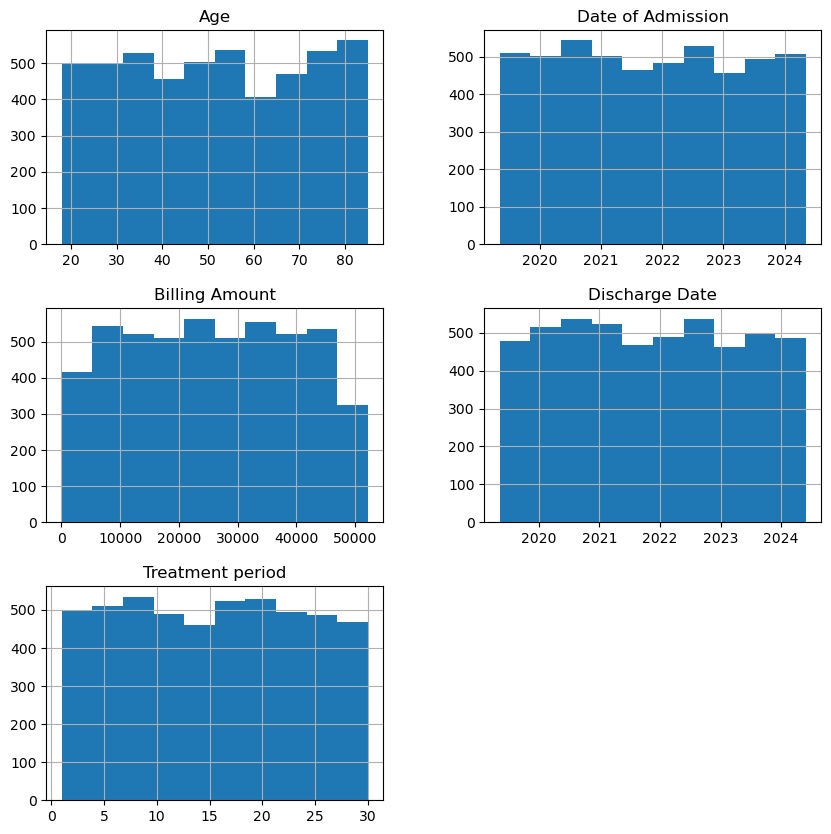

In [4485]:
df.drop(columns=['id']).hist(figsize=(10, 10))
plt.show()

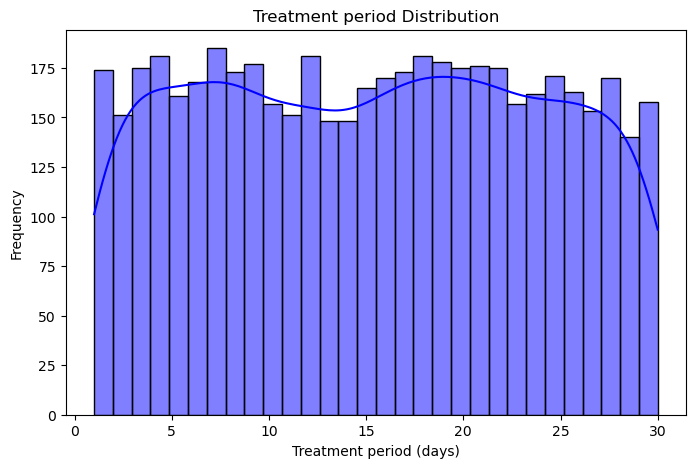

In [4486]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Treatment period'], bins=30, kde=True, color='blue')
plt.title('Treatment period Distribution')
plt.xlabel('Treatment period (days)')
plt.ylabel('Frequency')
plt.show()

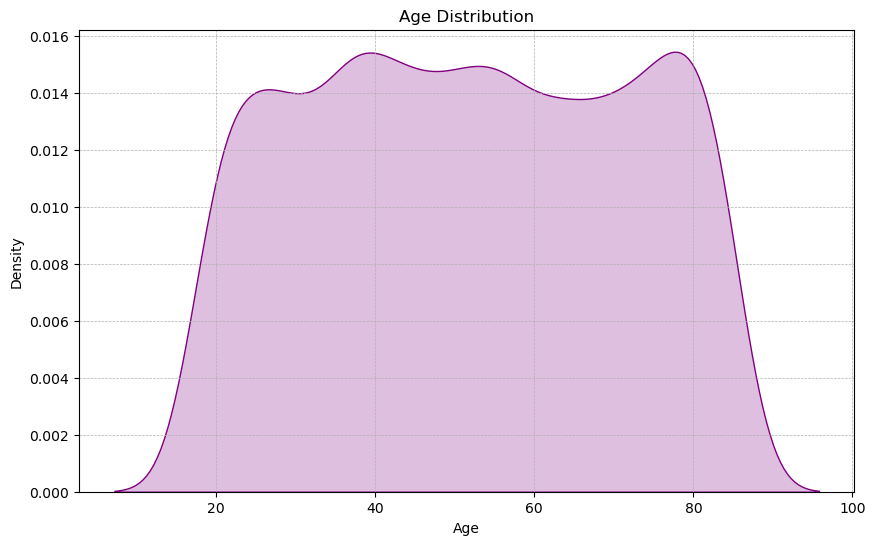

In [4487]:
# 1. Age Distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Age'], fill=True, color='purple', clip=(0, 100))  
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.show()

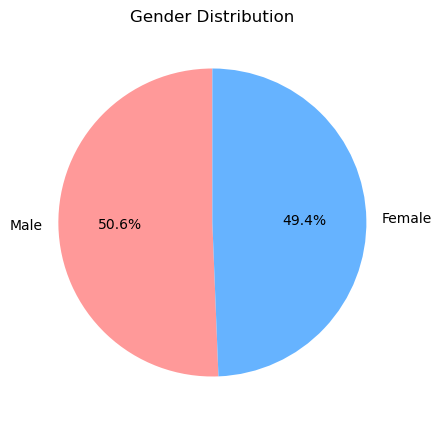

In [4488]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 5))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

## Research Question 5 : What are the Top 5 Medical Conditions?

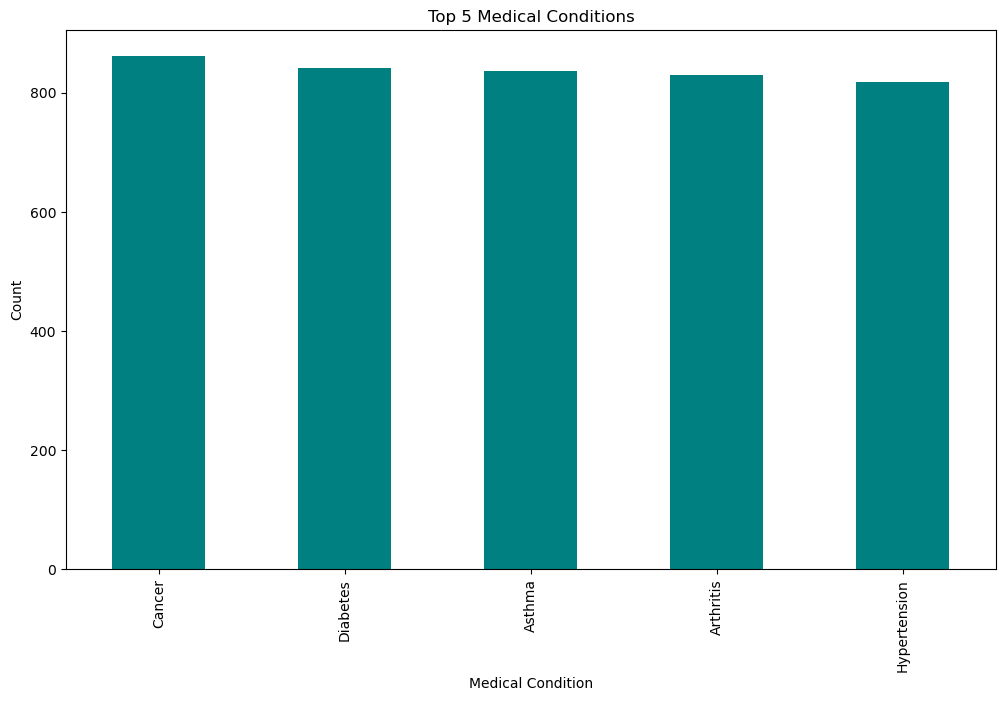

In [4490]:
# 3. Top 5 Medical Conditions
top_conditions = df['Medical Condition'].value_counts().nlargest(5)
plt.figure(figsize=(12, 7))
top_conditions.plot(kind='bar', color='teal')
plt.title('Top 5 Medical Conditions')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.show()

## Research Question 5 : What are the most commonly prescribed medications?

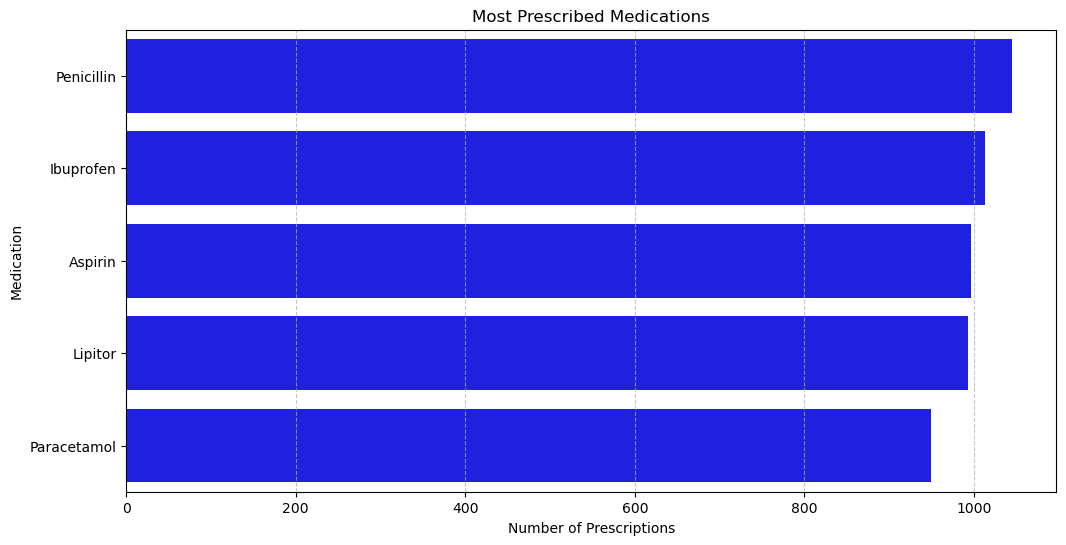

In [4492]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df,  y='Medication',order=df['Medication'].value_counts().index, color='blue',)

plt.title('Most Prescribed Medications')
plt.xlabel('Number of Prescriptions')
plt.ylabel('Medication')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

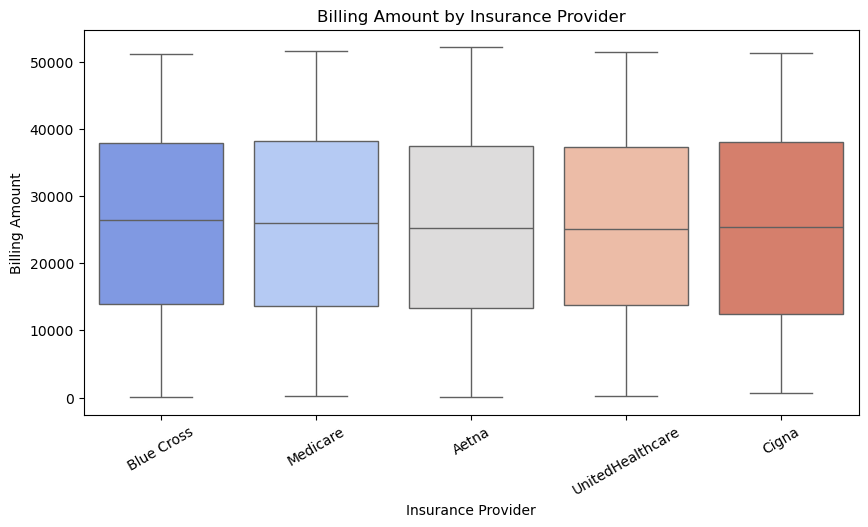

In [4493]:
# 5. Billing Amount by Insurance Provider
if 'Insurance Provider' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x='Insurance Provider', y='Billing Amount', hue='Insurance Provider', palette='coolwarm', dodge=False)
    plt.xticks(rotation=30)
    plt.title('Billing Amount by Insurance Provider')
    plt.xlabel('Insurance Provider')
    plt.ylabel('Billing Amount')
    plt.show()

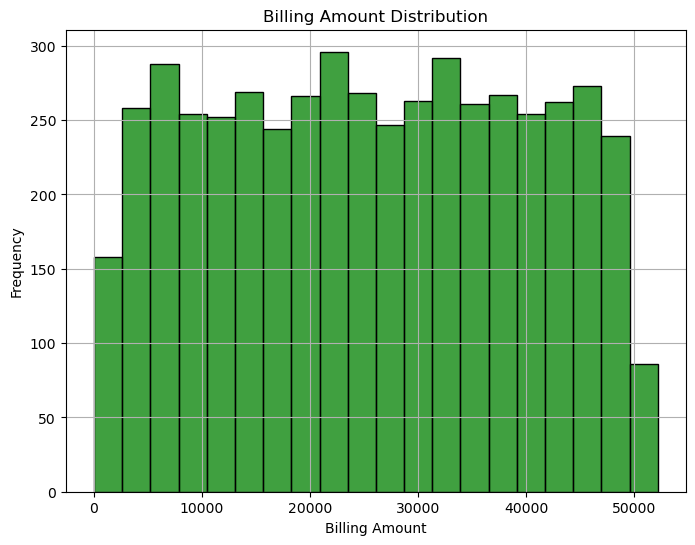

In [4494]:
# 6. Billing Amount Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Billing Amount'], bins=20, color='green')
plt.title('Billing Amount Distribution')
plt.xlabel('Billing Amount')
plt.ylabel('Frequency')
plt.grid()
plt.show()

## Research Question 10: Correlation between Age , Billing Amount , and Treatment period

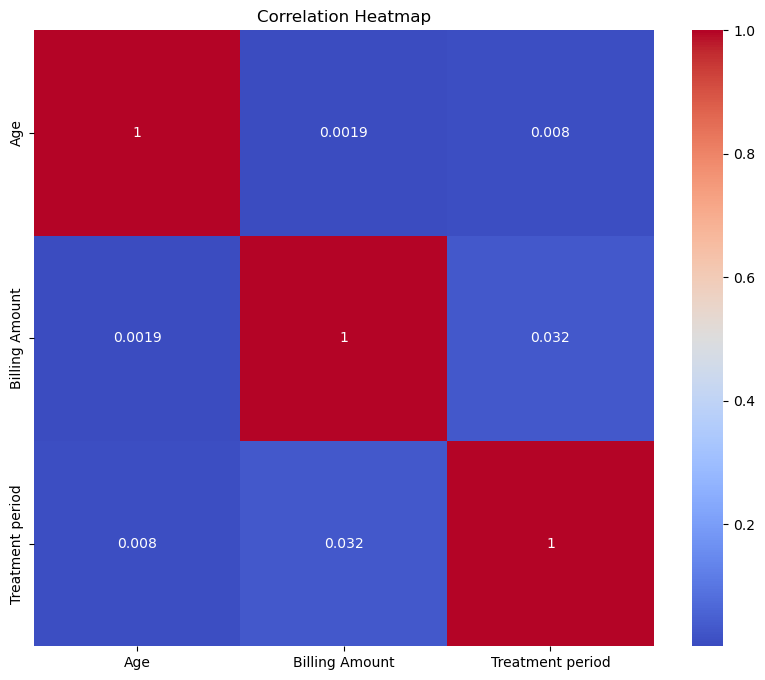

In [4495]:
numeric_data = df.select_dtypes(include=['number']).drop(columns=['id'])
corr = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

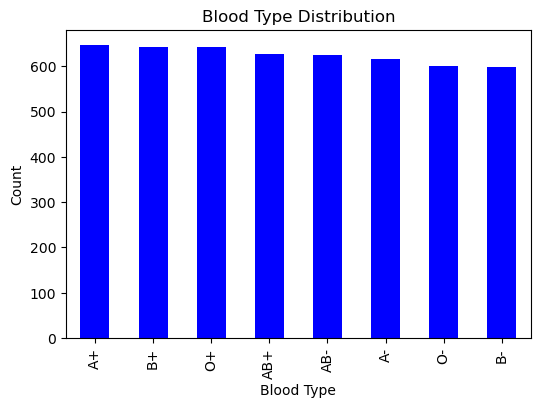

In [4496]:
# Blood Type Distribution
blood_type_counts = df['Blood Type'].value_counts()
plt.figure(figsize=(6, 4))
blood_type_counts.plot(kind='bar', color='blue')
plt.title("Blood Type Distribution")
plt.xlabel("Blood Type")
plt.ylabel("Count")
plt.show()

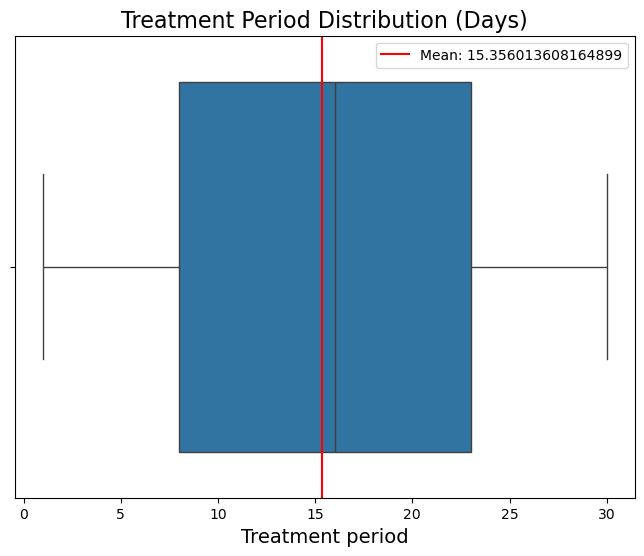

In [4497]:
# Treatment Period Distribution
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Treatment period'])
plt.title('Treatment Period Distribution (Days)', fontsize=16)
plt.xlabel('Treatment period', fontsize=14)
meanvalue = df['Treatment period'].mean()
plt.axvline(meanvalue, color='red', label=f'Mean: {meanvalue}')
plt.legend()
plt.show()

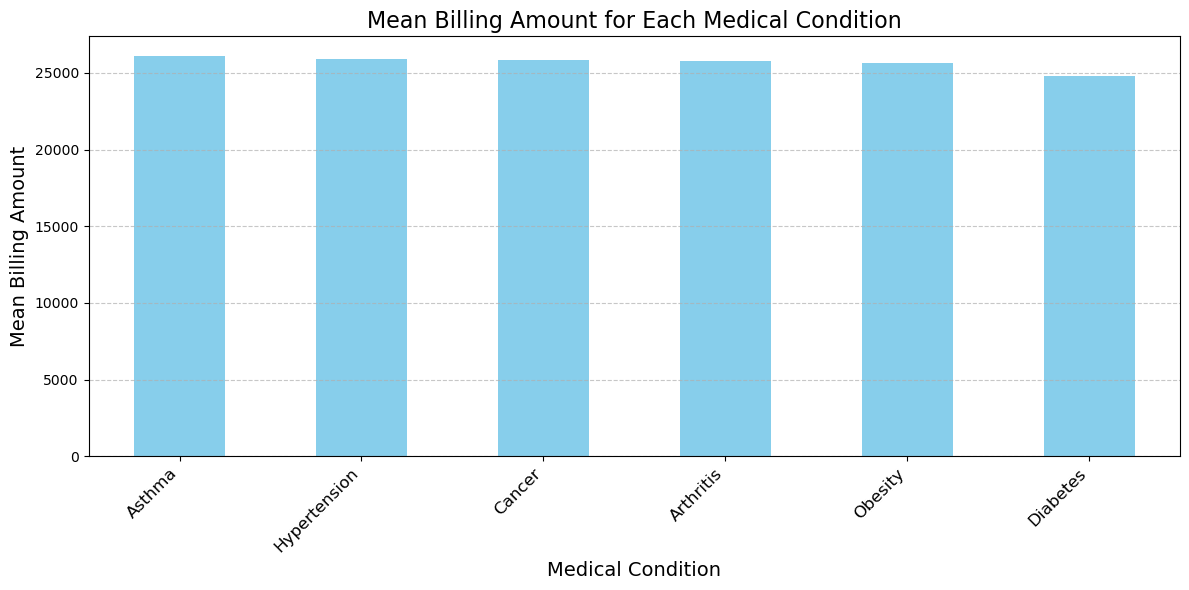

In [4498]:
# Calculate mean billing amount for each medical condition
mean_billing_per_condition = df.groupby('Medical Condition')['Billing Amount'].mean()
# Plot the mean billing amount for each medical condition
plt.figure(figsize=(12, 6))
mean_billing_per_condition.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Mean Billing Amount for Each Medical Condition', fontsize=16)
plt.xlabel('Medical Condition', fontsize=14)
plt.ylabel('Mean Billing Amount', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Research Question 8: Relationship between Billing Amount and Treatment period

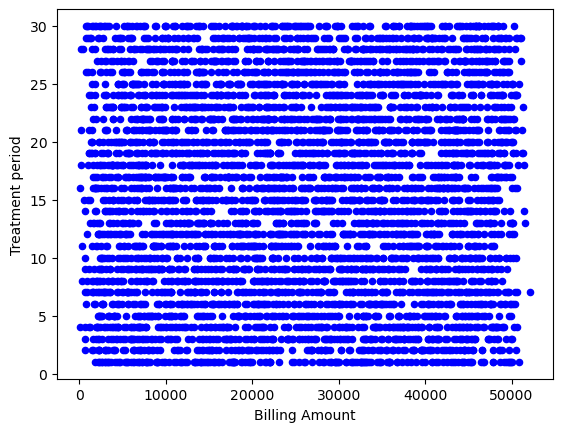

In [4500]:
df.plot(x= 'Billing Amount', y= 'Treatment period' , kind='scatter', color = 'blue');

 From the above bar graph: there is no relationship between Billing Amount and Treatment period.

In [4502]:
file_path = r'C:\Users\Future\OneDrive\Desktop\PROJECTS/final.xlsx' 
df.to_excel(file_path, index=False)